In [1]:
# import libraries and packages for the project
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import tensorflow as tf


C:\Users\devam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# load data from Tiingo 
df=pdr.get_data_tiingo('AAPL', api_key='f2ef0b8336df2fe913ab65c7b376303f06474aaa')

In [3]:
# convert the data to a csv file
df.to_csv('AAPL.csv')

In [4]:
# read the csv file
df=pd.read_csv('AAPL.csv')

In [5]:
# first 5 rows of the data
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-11 00:00:00+00:00,223.85,224.30,216.56,218.01,35749049,53.593237,53.700974,51.847895,52.195048,142996196,0.0,1.0
1,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
2,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
3,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
4,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0


In [6]:
# last 5 rows of the data 
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.46,189.920,188.28,189.485,45766503,0.0,1.0
1253,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.70,189.980,187.61,188.280,45280027,0.0,1.0
1254,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.91,188.850,181.47,188.400,81755816,0.0,1.0
1255,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.56,178.210,173.54,175.180,112488803,0.0,1.0
1256,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.350,65602066,178.18,180.239,177.79,178.350,65602066,0.0,1.0


In [7]:
# picking the close column Pandas_reset_index() is a method to reset index of a Data Frame
# reset_index() method sets a list of integer ranging from 0 to length of data as index
df1=df.reset_index()['close']

In [8]:
# fimd the shape of the data
df1.shape

(1257,)

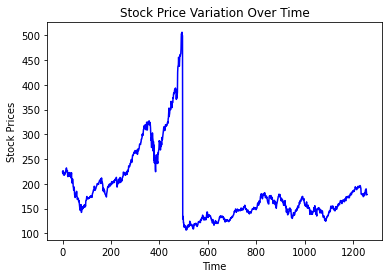

In [9]:
plt.plot(df1, color='blue')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Stock Price Variation Over Time')
plt.size=(20,20)
plt.show()

In [10]:
# specify the scaler range from 0 to 1 
scaler=MinMaxScaler(feature_range=(0,1))
# fut and transform the data to 2D array 
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1257, 1)

In [12]:
df1

array([[0.29307451],
       [0.28611146],
       [0.29948654],
       ...,
       [0.19053225],
       [0.17713212],
       [0.17868503]])

In [13]:
# divide the data into train and test sets
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:]

In [14]:
training_size,test_size

(817, 440)

In [15]:
len(train_data),len(test_data)

(817, 440)

In [16]:
print(train_data)

[[2.93074515e-01]
 [2.86111459e-01]
 [2.99486537e-01]
 [2.93049468e-01]
 [2.78121478e-01]
 [2.79023168e-01]
 [2.79348779e-01]
 [2.83506575e-01]
 [2.77570445e-01]
 [2.85410144e-01]
 [2.88916719e-01]
 [2.84483406e-01]
 [2.95829681e-01]
 [2.97808391e-01]
 [3.01615529e-01]
 [3.06675016e-01]
 [3.13663118e-01]
 [3.03443957e-01]
 [2.94176581e-01]
 [2.92874139e-01]
 [3.00638698e-01]
 [2.74314339e-01]
 [2.69530369e-01]
 [2.88716343e-01]
 [2.76819036e-01]
 [2.88816531e-01]
 [2.86412023e-01]
 [2.73462743e-01]
 [2.81703193e-01]
 [2.85059487e-01]
 [2.90269255e-01]
 [2.71133375e-01]
 [2.82930495e-01]
 [2.74164058e-01]
 [2.63994991e-01]
 [2.66649969e-01]
 [2.80576080e-01]
 [2.88991860e-01]
 [2.52072636e-01]
 [2.37319975e-01]
 [2.42780213e-01]
 [2.58259236e-01]
 [2.54602379e-01]
 [2.44533500e-01]
 [2.18735128e-01]
 [2.13876018e-01]
 [2.00275517e-01]
 [2.11822167e-01]
 [2.17132123e-01]
 [1.97921102e-01]
 [1.75679399e-01]
 [1.75178460e-01]
 [1.63932373e-01]
 [1.69768316e-01]
 [1.68816531e-01]
 [1.855979

In [17]:
print(test_data)

[[0.17092048]
 [0.16961803]
 [0.181866  ]
 [0.17257358]
 [0.16904195]
 [0.18149029]
 [0.16385723]
 [0.16105197]
 [0.15757044]
 [0.16568566]
 [0.17232311]
 [0.17392611]
 [0.18407013]
 [0.18146525]
 [0.18169067]
 [0.17873513]
 [0.17715717]
 [0.18827802]
 [0.18249217]
 [0.17051972]
 [0.16320601]
 [0.16363181]
 [0.1636819 ]
 [0.17092048]
 [0.17204759]
 [0.1636819 ]
 [0.16588604]
 [0.15769568]
 [0.14875391]
 [0.14444584]
 [0.13918597]
 [0.13720726]
 [0.13259862]
 [0.1323732 ]
 [0.13119599]
 [0.15902317]
 [0.17016907]
 [0.16974327]
 [0.17282405]
 [0.16546024]
 [0.16418284]
 [0.16235441]
 [0.1702943 ]
 [0.17392611]
 [0.16350657]
 [0.15479023]
 [0.15539136]
 [0.16518472]
 [0.16458359]
 [0.15539136]
 [0.15143394]
 [0.14396994]
 [0.13332498]
 [0.14001252]
 [0.14529743]
 [0.1459737 ]
 [0.14116468]
 [0.14958046]
 [0.14875391]
 [0.14108954]
 [0.13139637]
 [0.12673763]
 [0.14053851]
 [0.12944271]
 [0.11994991]
 [0.1096556 ]
 [0.1208516 ]
 [0.13212273]
 [0.13470257]
 [0.14311835]
 [0.14662492]
 [0.15

In [18]:
# convert into a dataset 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] # i=0, 0,1,2,3-----99 100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
# reshape into time step 100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
X_train.shape , y_train.shape

((716, 100), (716,))

In [21]:
X_test.shape , y_test.shape

((339, 100), (339,))

In [22]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit (X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 230ms/step - loss: 0.0380 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0143 - val_loss: 9.4211e-04
Epoch 3/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0104 - val_loss: 3.7515e-04
Epoch 4/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0096 - val_loss: 7.1871e-04
Epoch 5/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0109 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0090 - val_loss: 3.5272e-04
Epoch 7/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0077 - val_loss: 3.0547e-04
Epoch 8/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0065 - val_loss: 0.0010
Epoch 9/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0061 - val_loss: 3.4248e-04
Epoch 10/100
12/12 [==============================] - 2s 135ms/step

In [ ]:
tf.__version__

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)